In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.neural_network import MLPRegressor

In [2]:
data=pd.read_excel(r'C:\Users\NITEESH\Downloads\Telegram Desktop\project.xlsx')

In [3]:
data

,DATES,RUNOFF(Cumes),AVERAGE RAINFALL(mm/day)
0,2009-01-01,237.62383,0.0000
1,2009-01-02,238.6355,0.0300
2,2009-01-03,236,0.0125
3,2009-01-04,238,0.0025
4,2009-01-05,232.05756,0.0000
...,...,...,...
2548,2015-12-28,254.35973,0.0000
2549,2015-12-29,241.89023,0.0000
2550,2015-12-30,254.69104,0.0000
2551,2015-12-31,203.03522,0.0000


In [4]:
data=data.drop(2552)
data['RUNOFF(Cumes)']=data['RUNOFF(Cumes)'].astype('float')
data

,DATES,RUNOFF(Cumes),AVERAGE RAINFALL(mm/day)
0,2009-01-01,237.62383,0.0000
1,2009-01-02,238.63550,0.0300
2,2009-01-03,236.00000,0.0125
3,2009-01-04,238.00000,0.0025
4,2009-01-05,232.05756,0.0000
...,...,...,...
2547,2015-12-27,271.80314,0.0000
2548,2015-12-28,254.35973,0.0000
2549,2015-12-29,241.89023,0.0000
2550,2015-12-30,254.69104,0.0000


In [5]:
data.describe()

,RUNOFF(Cumes),AVERAGE RAINFALL(mm/day)
count,2552.000000,2552.000000
mean,2536.308765,3.058114
std,5203.616438,6.225914
min,47.143963,0.000000
25%,255.896600,0.000000
50%,405.185800,0.178750
75%,2016.836550,3.177188
max,39046.710000,52.397500


In [6]:
data['RunOff (t-1)']=data['RUNOFF(Cumes)'].shift(1)
data['RunOff (t-2)']=data['RUNOFF(Cumes)'].shift(2)
data['RunOff (t-3)']=data['RUNOFF(Cumes)'].shift(3)
data['RunOff (t-4)']=data['RUNOFF(Cumes)'].shift(4)
data['AVERAGE RAINFALL(mm/day)(t-1)']=data['AVERAGE RAINFALL(mm/day)'].shift(1)
data['AVERAGE RAINFALL(mm/day)(t-2)']=data['AVERAGE RAINFALL(mm/day)'].shift(2)
data['AVERAGE RAINFALL(mm/day)(t-3)']=data['AVERAGE RAINFALL(mm/day)'].shift(3)
data['AVERAGE RAINFALL(mm/day)(t-4)']=data['AVERAGE RAINFALL(mm/day)'].shift(4)

In [7]:
data.dropna(inplace=True)

In [8]:
data

,DATES,RUNOFF(Cumes),AVERAGE RAINFALL(mm/day),RunOff (t-1),RunOff (t-2),RunOff (t-3),RunOff (t-4),AVERAGE RAINFALL(mm/day)(t-1),AVERAGE RAINFALL(mm/day)(t-2),AVERAGE RAINFALL(mm/day)(t-3),AVERAGE RAINFALL(mm/day)(t-4)
4,2009-01-05,232.05756,0.000,238.00000,236.000000,238.635500,237.623830,0.0025,0.01250,0.03000,0.00000
5,2009-01-06,230.00000,0.000,232.05756,238.000000,236.000000,238.635500,0.0000,0.00250,0.01250,0.03000
6,2009-01-07,232.00000,0.000,230.00000,232.057560,238.000000,236.000000,0.0000,0.00000,0.00250,0.01250
7,2009-01-08,230.00000,0.005,232.00000,230.000000,232.057560,238.000000,0.0000,0.00000,0.00000,0.00250
8,2009-01-09,221.77718,0.000,230.00000,232.000000,230.000000,232.057560,0.0050,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
2547,2015-12-27,271.80314,0.000,289.24655,295.057503,300.868455,312.490360,0.2175,0.26875,0.00000,0.00000
2548,2015-12-28,254.35973,0.000,271.80314,289.246550,295.057503,300.868455,0.0000,0.21750,0.26875,0.00000
2549,2015-12-29,241.89023,0.000,254.35973,271.803140,289.246550,295.057503,0.0000,0.00000,0.21750,0.26875
2550,2015-12-30,254.69104,0.000,241.89023,254.359730,271.803140,289.246550,0.0000,0.00000,0.00000,0.21750


In [9]:
data.set_index('DATES',inplace=True)

<AxesSubplot:xlabel='DATES'>

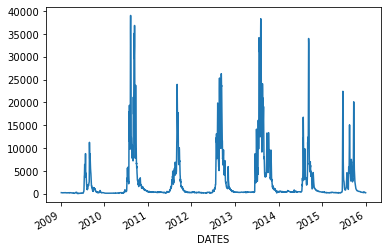

In [10]:
data['RUNOFF(Cumes)'].plot()

In [11]:
data

,RUNOFF(Cumes),AVERAGE RAINFALL(mm/day),RunOff (t-1),RunOff (t-2),RunOff (t-3),RunOff (t-4),AVERAGE RAINFALL(mm/day)(t-1),AVERAGE RAINFALL(mm/day)(t-2),AVERAGE RAINFALL(mm/day)(t-3),AVERAGE RAINFALL(mm/day)(t-4)
DATES,,,,,,,,,,
2009-01-05,232.05756,0.000,238.00000,236.000000,238.635500,237.623830,0.0025,0.01250,0.03000,0.00000
2009-01-06,230.00000,0.000,232.05756,238.000000,236.000000,238.635500,0.0000,0.00250,0.01250,0.03000
2009-01-07,232.00000,0.000,230.00000,232.057560,238.000000,236.000000,0.0000,0.00000,0.00250,0.01250
2009-01-08,230.00000,0.005,232.00000,230.000000,232.057560,238.000000,0.0000,0.00000,0.00000,0.00250
2009-01-09,221.77718,0.000,230.00000,232.000000,230.000000,232.057560,0.0050,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...
2015-12-27,271.80314,0.000,289.24655,295.057503,300.868455,312.490360,0.2175,0.26875,0.00000,0.00000
2015-12-28,254.35973,0.000,271.80314,289.246550,295.057503,300.868455,0.0000,0.21750,0.26875,0.00000
2015-12-29,241.89023,0.000,254.35973,271.803140,289.246550,295.057503,0.0000,0.00000,0.21750,0.26875


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2009-01-05 to 2015-12-31
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RUNOFF(Cumes)                  2548 non-null   float64
 1   AVERAGE RAINFALL(mm/day)       2548 non-null   float64
 2   RunOff (t-1)                   2548 non-null   float64
 3   RunOff (t-2)                   2548 non-null   float64
 4   RunOff (t-3)                   2548 non-null   float64
 5   RunOff (t-4)                   2548 non-null   float64
 6   AVERAGE RAINFALL(mm/day)(t-1)  2548 non-null   float64
 7   AVERAGE RAINFALL(mm/day)(t-2)  2548 non-null   float64
 8   AVERAGE RAINFALL(mm/day)(t-3)  2548 non-null   float64
 9   AVERAGE RAINFALL(mm/day)(t-4)  2548 non-null   float64
dtypes: float64(10)
memory usage: 219.0 KB


In [13]:
y=data['RUNOFF(Cumes)']
x=data.drop('RUNOFF(Cumes)',axis=1)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [15]:
model = MLPRegressor()
model.fit(x_train,y_train)
print('train score:',model.score(x_train,y_train))
print("Test Score:",model.score(x_test,y_test))

train score: 0.9445943622318635
Test Score: 0.9325431074490316


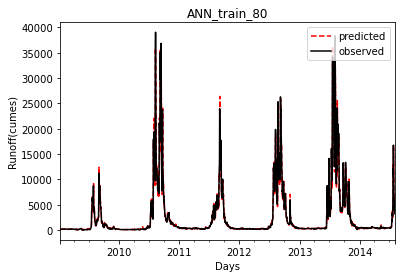

In [16]:
pred=model.predict(x_train)
results=pd.DataFrame({'predicted':list(pred),'observed':y_train})
results['predicted'].plot(color='red',linestyle='--')
results['observed'].plot(color='black',linestyle='-')
plt.xlabel('Days')
plt.ylabel('Runoff(cumes)')
plt.title('ANN_train_80')
plt.legend(loc='upper right')
plt.savefig('ANN_train_80_black.png')
plt.show()

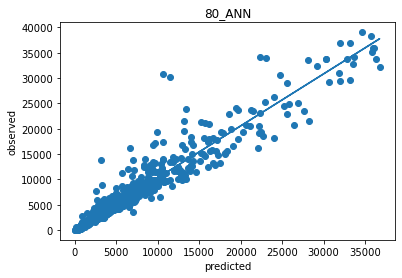

In [17]:
plt.scatter(pred,y_train)
m, b = np.polyfit(pred,y_train, 1)

#add linear regression line to scatterplot 
plt.plot(pred,m*pred+b)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('80_ANN')
plt.savefig('80_ANN_scatter.jpg')

In [18]:
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_train,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)

TS 75:  97.44847890088322 TS 100:  98.72423945044162


In [19]:
results.to_csv('80_ANN.csv')
results

,predicted,observed
DATES,,
2009-01-05,227.818948,232.05756
2009-01-06,218.903483,230.00000
2009-01-07,218.188818,232.00000
2009-01-08,222.519920,230.00000
2009-01-09,218.549411,221.77718
...,...,...
2014-07-31,5389.997034,4933.72560
2014-08-01,4624.293230,3888.45100
2014-08-02,3503.774560,5931.70100


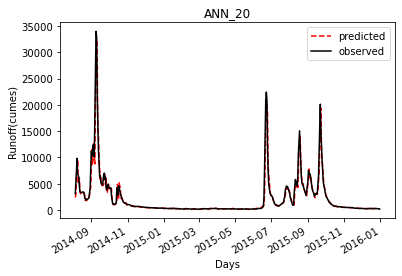

In [20]:
pred=model.predict(x_test)
results=pd.DataFrame({'predicted':list(pred),'observed':y_test})
results['predicted'].plot(color='red',linestyle='--')
results['observed'].plot(color='black',linestyle='-')
plt.xlabel('Days')
plt.ylabel('Runoff(cumes)')
plt.title('ANN_20')
plt.legend(loc='upper right')
plt.savefig('ANN_20_black.png')
plt.show()

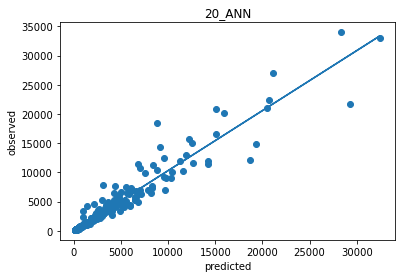

In [21]:
plt.scatter(pred,y_test)
m, b = np.polyfit(pred,y_test, 1)

#add linear regression line to scatterplot 
plt.plot(pred,m*pred+b)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('20_ANN')
plt.savefig('20_ANN_scatter.jpg')

In [22]:
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_test,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)

TS 75:  100.0 TS 100:  100.0


In [23]:
results.to_csv('20_ANN.csv')
results

,predicted,observed
DATES,,
2014-08-05,2390.523293,3082.45800
2014-08-06,2972.078931,5244.10400
2014-08-07,6029.375992,7250.02540
2014-08-08,7530.394008,9838.56200
2014-08-09,9628.714157,6904.63200
...,...,...
2015-12-27,275.715655,271.80314
2015-12-28,253.627682,254.35973
2015-12-29,236.654219,241.89023


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [25]:
model = MLPRegressor()
model.fit(x_train,y_train)
print('train score:',model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))

train score: 0.9469388012081174
Test Score 0.9243383274694039


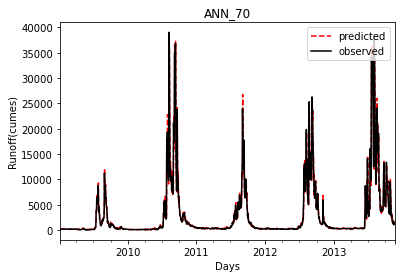

In [26]:
pred=model.predict(x_train)
results=pd.DataFrame({'predicted':list(pred),'observed':y_train})
results['predicted'].plot(color='red',linestyle='--')
results['observed'].plot(color='black',linestyle='-')
plt.xlabel('Days')
plt.ylabel('Runoff(cumes)')
plt.title('ANN_70')
plt.legend(loc='upper right')
plt.savefig('ANN_70_black.png')
plt.show()

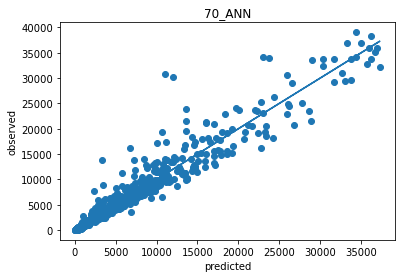

In [27]:
plt.scatter(pred,y_train)
m, b = np.polyfit(pred,y_train, 1)

#add linear regression line to scatterplot 
plt.plot(pred,m*pred+b)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('70_ANN')
plt.savefig('70_ANN_scatter.jpg')

In [28]:
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_train,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)

TS 75:  96.52271452607964 TS 100:  98.20527201346046


In [29]:
results.to_csv('70_ANN.csv')
results

,predicted,observed
DATES,,
2009-01-05,233.266701,232.05756
2009-01-06,224.267546,230.00000
2009-01-07,223.848999,232.00000
2009-01-08,227.886602,230.00000
2009-01-09,223.639525,221.77718
...,...,...
2013-11-18,989.337774,1386.72190
2013-11-19,1448.114410,1197.91240
2013-11-20,1169.960601,1147.78560


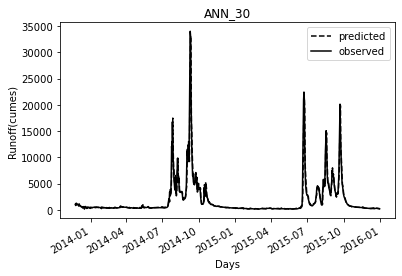

In [30]:
pred=model.predict(x_test)
results=pd.DataFrame({'predicted':list(pred),'observed':y_test})
results['predicted'].plot(color='black',linestyle='--')
results['observed'].plot(color='black',linestyle='-')
plt.xlabel('Days')
plt.ylabel('Runoff(cumes)')
plt.title('ANN_30')
plt.legend(loc='upper right')
plt.savefig('ANN_30_black.png')
plt.show()

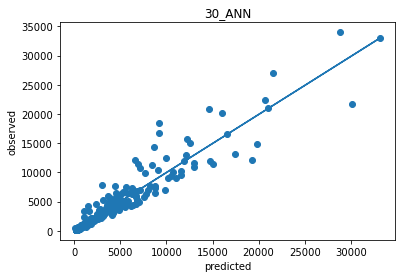

In [31]:
plt.scatter(pred,y_test)
m, b = np.polyfit(pred,y_test, 1)

#add linear regression line to scatterplot 
plt.plot(pred,m*pred+b)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('30_ANN')
plt.savefig('30_ANN_scatter.jpg')

In [32]:
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_test,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)

TS 75:  99.47712418300654 TS 100:  99.73856209150327


In [33]:
results.to_csv('30_ANN.csv')
results

,predicted,observed
DATES,,
2013-11-23,1301.632473,1032.45730
2013-11-24,1197.250437,842.79430
2013-11-25,969.651099,1052.90100
2013-11-26,1269.067306,1033.70230
2013-11-27,1054.455743,1064.90810
...,...,...
2015-12-27,283.513025,271.80314
2015-12-28,261.538408,254.35973
2015-12-29,244.335726,241.89023


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,shuffle=False)

In [35]:
model = MLPRegressor()
model.fit(x_train,y_train)
print('train score:',model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))

train score: 0.9402490491572618
Test Score 0.9443743717730432


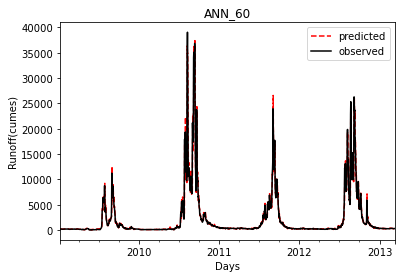

In [36]:
pred=model.predict(x_train)
results=pd.DataFrame({'predicted':list(pred),'observed':y_train})
results['predicted'].plot(color='red',linestyle='--')
results['observed'].plot(color='black',linestyle='-')
plt.xlabel('Days')
plt.ylabel('Runoff(cumes)')
plt.title('ANN_60')
plt.legend(loc='upper right')
plt.savefig('ANN_60_black.png')
plt.show()

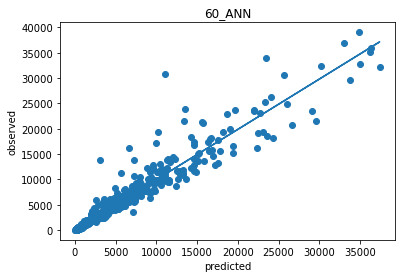

In [37]:
plt.scatter(pred,y_train)
m, b = np.polyfit(pred,y_train, 1)

#add linear regression line to scatterplot 
plt.plot(pred,m*pred+b)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('60_ANN')
plt.savefig('60_ANN_scatter.jpg')

In [38]:
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_train,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)

TS 75:  97.97120418848168 TS 100:  98.7565445026178


In [39]:
results.to_csv('60_ANN.csv')
results

,predicted,observed
DATES,,
2009-01-05,235.293056,232.05756
2009-01-06,227.129812,230.00000
2009-01-07,225.877684,232.00000
2009-01-08,230.204470,230.00000
2009-01-09,226.295663,221.77718
...,...,...
2013-03-08,286.202772,292.24036
2013-03-09,287.744410,294.09113
2013-03-10,290.013097,280.45400


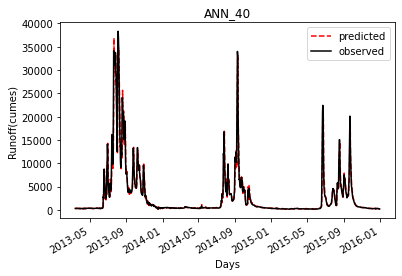

In [40]:
pred=model.predict(x_test)
results=pd.DataFrame({'predicted':list(pred),'observed':y_test})
results['predicted'].plot(color='red',linestyle='--')
results['observed'].plot(color='black',linestyle='-')
plt.xlabel('Days')
plt.ylabel('Runoff(cumes)')
plt.title('ANN_40')
plt.legend(loc='upper right')
plt.savefig('ANN_40_black.png')
plt.show()

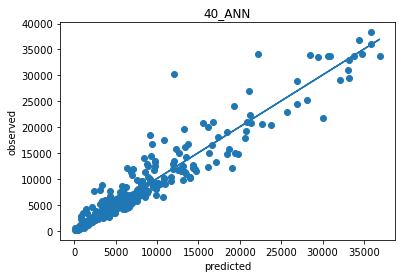

In [41]:
plt.scatter(pred,y_test)
m, b = np.polyfit(pred,y_test, 1)

#add linear regression line to scatterplot 
plt.plot(pred,m*pred+b)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('40_ANN')
plt.savefig('40_ANN_scatter.jpg')

In [42]:
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_test,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)

TS 75:  99.70588235294117 TS 100:  99.80392156862744


In [43]:
results.to_csv('40_ANN.csv')
results

,predicted,observed
DATES,,
2013-03-13,333.058740,324.33057
2013-03-14,314.501073,295.17325
2013-03-15,276.397982,327.83478
2013-03-16,334.466670,330.75970
2013-03-17,329.427956,313.62850
...,...,...
2015-12-27,286.072268,271.80314
2015-12-28,264.260126,254.35973
2015-12-29,247.019717,241.89023


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,shuffle=False)

In [45]:
model = MLPRegressor()
model.fit(x_train,y_train)
print('train score:',model.score(x_train,y_train))
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_train,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)
print("Test Score",model.score(x_test,y_test))


train score: 0.9378557816721397
TS 75:  32.254901960784316 TS 100:  55.78431372549019
Test Score 0.9438972664886904


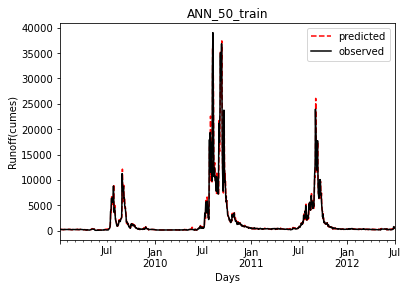

In [46]:
pred=model.predict(x_train)
results=pd.DataFrame({'predicted':list(pred),'observed':y_train})
results['predicted'].plot(color='red',linestyle='--')
results['observed'].plot(color='black',linestyle='-')
plt.xlabel('Days')
plt.ylabel('Runoff(cumes)')
plt.title('ANN_50_train')
plt.legend(loc='upper right')
plt.savefig('ANN_50_train_black.png')
plt.show()

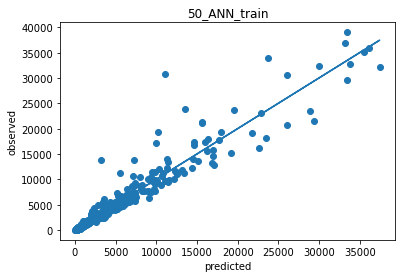

In [47]:
plt.scatter(pred,y_train)
m, b = np.polyfit(pred,y_train, 1)

#add linear regression line to scatterplot 
plt.plot(pred,m*pred+b)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('50_ANN_train')
plt.savefig('50_ANN_train_scatter.jpg')

In [48]:
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_train,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)

TS 75:  97.64521193092622 TS 100:  98.43014128728414


In [49]:
results.to_csv('50_ANN_train.csv')
results

,predicted,observed
DATES,,
2009-01-05,234.564288,232.05756
2009-01-06,226.389560,230.00000
2009-01-07,224.951457,232.00000
2009-01-08,229.692556,230.00000
2009-01-09,225.655047,221.77718
...,...,...
2012-06-27,891.916939,777.58330
2012-06-28,819.619561,710.67487
2012-06-29,671.492660,645.90880


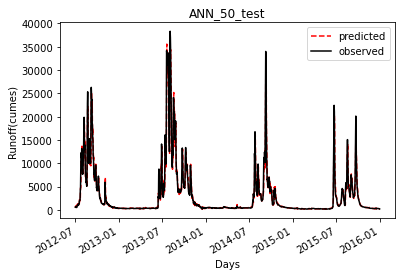

In [50]:
pred=model.predict(x_test)
results=pd.DataFrame({'predicted':list(pred),'observed':y_test})
results['predicted'].plot(color='red',linestyle='--')
results['observed'].plot(color='black',linestyle='-')
plt.xlabel('Days')
plt.ylabel('Runoff(cumes)')
plt.title('ANN_50_test')
plt.legend(loc='upper right')
plt.savefig('ANN_50_black_test.png')
plt.show()

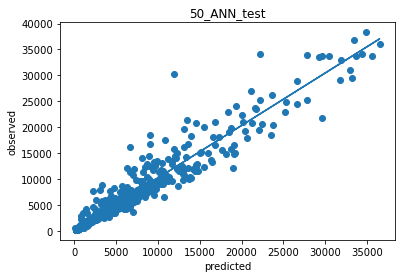

In [51]:
plt.scatter(pred,y_test)
m, b = np.polyfit(pred,y_test, 1)

#add linear regression line to scatterplot 
plt.plot(pred,m*pred+b)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.title('50_ANN_test')
plt.savefig('50_ANN_test_scatter.jpg')

In [52]:
def fun(a,p):
    ARE = []
    n = len(pred)
    for i in range(n):
        val = (abs(a[i]-p[i])/a[i])*100
        ARE.append(val)
    c = 0
    for i in range(n):
        if ARE[i]<75:
            c+=1
    TS_75 = (c*100)/n
    
    d = 0
    for i in range(n):
        if ARE[i]<100:
            d+=1
    TS_100 = (d*100)/n
    
    return TS_75,TS_100

TS_75,TS_100 = fun(y_test,pred)

print("TS 75: ", TS_75, "TS 100: ", TS_100)

TS 75:  99.60753532182103 TS 100:  99.84301412872841


In [53]:
results.to_csv('50_ANN_test.csv')
results

,predicted,observed
DATES,,
2012-07-02,503.022499,595.76140
2012-07-03,760.201455,694.59406
2012-07-04,835.213413,657.53590
2012-07-05,667.109064,533.31230
2012-07-06,524.465873,676.50806
...,...,...
2015-12-27,285.466137,271.80314
2015-12-28,263.220468,254.35973
2015-12-29,245.624827,241.89023
